In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import Data_Loading

df = Data_Loading.load_whisky_data(
    remove_guests=True,        # Remove guest scores
    remove_USwhiskies=False,   # Keep US whiskies in the dataset
    remove_thresh=0,           # No low sccore removal
    pointscale=False,          # No score rescaling
    fill_missing_age=True,     # Set a placeholder for missing whisky ages and adds a field noting this
    min_whiskies_per_region=0  # Do not remove uncommon region whiskies
)

df

,Meeting_Number,Attendee,Whisky_ID,Whisky_Score,Guest,Whisky_Distillery,Whisky_Age_Corrected,Whisky_Description,Whisky_Region,Whisky_ABV,Whisky_Price,Whisky_OB,Tasting_Position,Age_Missing
0,1,Gary Brown,1,8.0,0,Bladnoch,10.0,Utd. distillers.Flora & Fauna. Single malt,Lowland,0.430,83.0,1,1,0
1,1,Gary Nicolson,1,6.0,0,Bladnoch,10.0,Utd. distillers.Flora & Fauna. Single malt,Lowland,0.430,83.0,1,1,0
2,1,Jayson Samuli,1,8.0,0,Bladnoch,10.0,Utd. distillers.Flora & Fauna. Single malt,Lowland,0.430,83.0,1,1,0
3,1,John Gowey,1,7.0,0,Bladnoch,10.0,Utd. distillers.Flora & Fauna. Single malt,Lowland,0.430,83.0,1,1,0
4,1,John Houston,1,7.0,0,Bladnoch,10.0,Utd. distillers.Flora & Fauna. Single malt,Lowland,0.430,83.0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11736,123,Mark McLaughlin,749,8.7,0,Kilchoman,15.0,Kilchoman 15Yr Oloroso,Islay,0.518,255.0,1,8,0
11737,123,Miles Kelly,749,8.5,0,Kilchoman,15.0,Kilchoman 15Yr Oloroso,Islay,0.518,255.0,1,8,0
11738,123,Ronnie Reilly,749,8.9,0,Kilchoman,15.0,Kilchoman 15Yr Oloroso,Islay,0.518,255.0,1,8,0
11739,123,Steve Scott,749,8.8,0,Kilchoman,15.0,Kilchoman 15Yr Oloroso,Islay,0.518,255.0,1,8,0


In [3]:
# For a specified attendee, this code checks who scores most simialrly to that attendee, as judged by simple correlation

# Specify the target attendee and score count threshold (lower counts are exlcuded from analysis)
target_attendee = "David Melaugh"
attendee_score_filter = 200

# Count the number of scores for each attendee
attendee_score_counts = df['Attendee'].value_counts()

# Filter attendees with more than score_count_threshold
valid_attendees = attendee_score_counts[attendee_score_counts > attendee_score_filter].index

# Create a pivot table: rows are Whisky_IDs, columns are attendees, values are Whisky_Score
pivot_table = df.pivot(index='Whisky_ID', columns='Attendee', values='Whisky_Score')

# Filter the pivot table to include only attendees with more than score_count_threshold scores
pivot_table = pivot_table[valid_attendees]

# Check if the target attendee exists in the dataset
if target_attendee not in pivot_table.columns:
    print(f"Attendee '{target_attendee}' not found in the dataset or does not have more than 50 scores.")
else:
    # Extract the target attendee's scores
    target_scores = pivot_table[target_attendee]

    # Compute similarity using Pearson correlation
    similarity = pivot_table.corrwith(target_scores, axis=0)

    # Sort similarity scores in descending order
    similarity_sorted = similarity.sort_values(ascending=False)

    # Remove the target attendee from the results
    similarity_sorted = similarity_sorted.drop(labels=target_attendee, errors='ignore')

    # Display the top 10 most similar attendees
    print(f"Attendees with the most similar scoring patterns to {target_attendee} who have at least {attendee_score_filter} scores:")
    print(similarity_sorted.head(10))


Attendees with the most similar scoring patterns to David Melaugh who have at least 200 scores:
Attendee
Clark Payan        0.682519
John Houston       0.670377
Alan Purves        0.634612
Brad Wallace       0.615791
Erin McFall        0.594642
Ken Burnthorn      0.585111
Mark McLaughlin    0.581371
Steve Scott        0.579828
Cyndi McSporran    0.570935
Miles Kelly        0.546229
dtype: float64


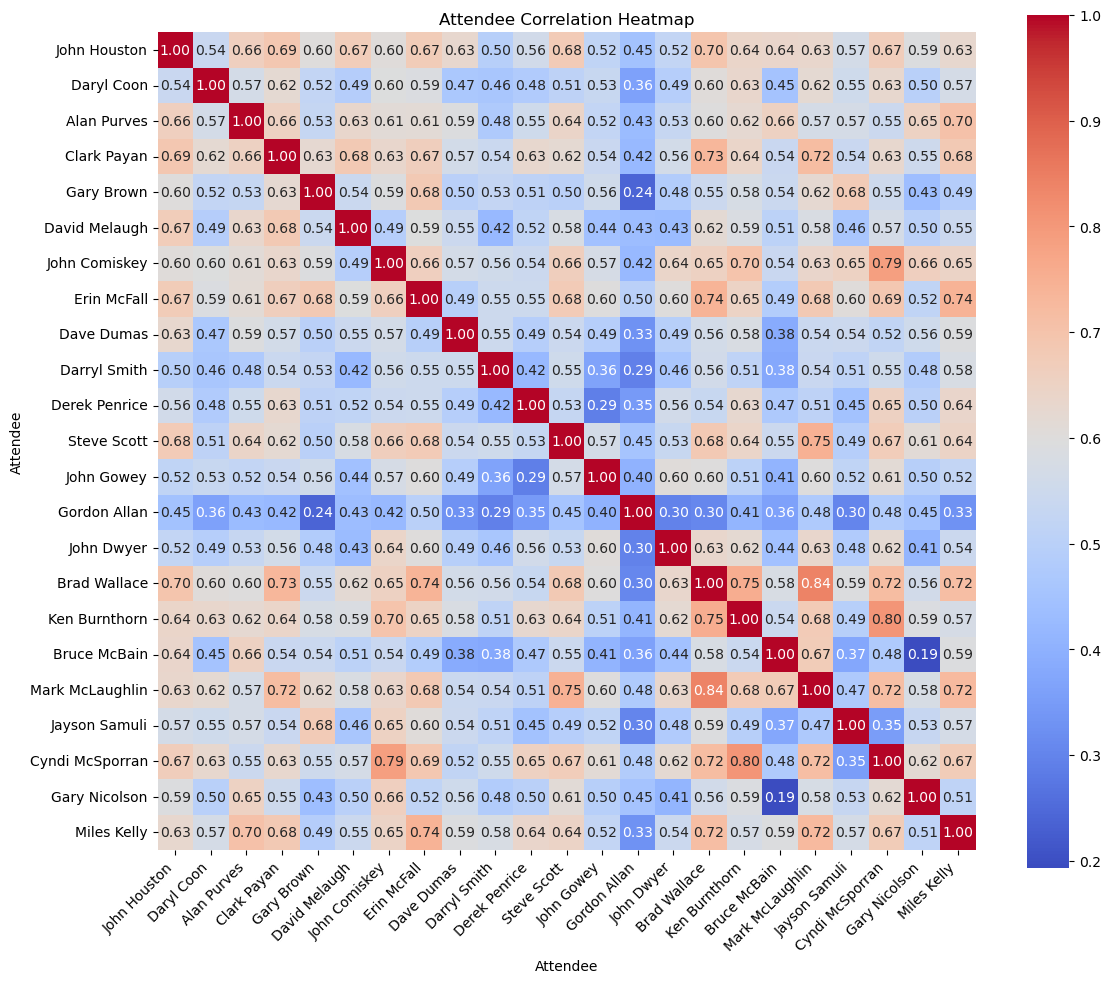


Most Correlated Attendee for Each Attendee:
John Houston is most correlated with Brad Wallace (Correlation: 0.70)
Daryl Coon is most correlated with Ken Burnthorn (Correlation: 0.63)
Alan Purves is most correlated with Miles Kelly (Correlation: 0.70)
Clark Payan is most correlated with Brad Wallace (Correlation: 0.73)
Gary Brown is most correlated with Erin McFall (Correlation: 0.68)
David Melaugh is most correlated with Clark Payan (Correlation: 0.68)
John Comiskey is most correlated with Cyndi McSporran (Correlation: 0.79)
Erin McFall is most correlated with Miles Kelly (Correlation: 0.74)
Dave Dumas is most correlated with John Houston (Correlation: 0.63)
Darryl Smith is most correlated with Miles Kelly (Correlation: 0.58)
Derek Penrice is most correlated with Cyndi McSporran (Correlation: 0.65)
Steve Scott is most correlated with Mark McLaughlin (Correlation: 0.75)
John Gowey is most correlated with Cyndi McSporran (Correlation: 0.61)
Gordon Allan is most correlated with Erin McFa

In [5]:
# Evaluate which attendees are most correlated to other attendees, and present the results in a variety of ways

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

attendee_score_filter = 200 # Minimum number of scores for attendees

# Count attendee scores and filter attendees
attendee_score_counts = df['Attendee'].value_counts()
valid_attendees = attendee_score_counts[attendee_score_counts > attendee_score_filter].index

# Create a pivot table with Whisky_ID as index and Attendees as columns
pivot_table = df.pivot(index='Whisky_ID', columns='Attendee', values='Whisky_Score')

# Filter columns (attendees) instead of rows
pivot_table = pivot_table.loc[:, valid_attendees]

# Handle missing values by filling with attendee mean scores [should be no missing scores, so comment out]
#pivot_table = pivot_table.apply(lambda col: col.fillna(col.mean()), axis=0)

# Compute correlation matrix
correlation_matrix = pivot_table.corr()

# Display the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(
    correlation_matrix,
    annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True
)
plt.title("Attendee Correlation Heatmap")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig("correlationmatrix.png", dpi=300, bbox_inches='tight') 
plt.show()

# Find the most correlated attendee for each attendee
most_correlated = {
    attendee: (correlation_matrix.loc[attendee].drop(attendee).idxmax(),
               correlation_matrix.loc[attendee].drop(attendee).max())
    for attendee in correlation_matrix.columns
}

# Print most correlated attendees
print("\nMost Correlated Attendee for Each Attendee:")
for attendee, (most_corr, corr_value) in most_correlated.items():
    print(f"{attendee} is most correlated with {most_corr} (Correlation: {corr_value:.2f})")

# Save results to CSV [optional]
#pd.DataFrame.from_dict(most_correlated, orient='index', columns=['Most_Correlated', 'Correlation']).to_csv('most_correlated_attendees.csv')

# Compute and display average correlations
average_correlation = correlation_matrix.mean(axis=1).sort_values(ascending=False)
print("\nAverage Correlation for Each Attendee:")
print(average_correlation.round(2))
